## Gradient Descent 1D


In [10]:
# Imports
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib_inline import backend_inline

backend_inline.set_matplotlib_formats("svg")

import sympy as sym
import sympy.plotting.plot as symplot

import copy

In [11]:
# Function
def fx(x):
    return 3 * x**2 - 3 * x + 4


# Derivative
def dfx(x):
    return 6 * x - 3

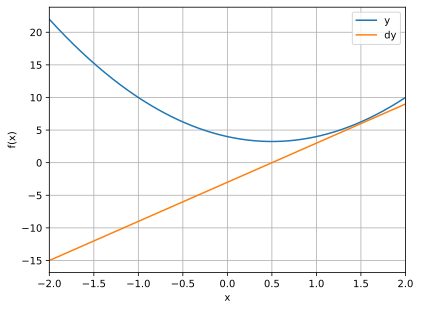

In [12]:
# Plot function and it's derivative
# define a range for x
x = np.linspace(-2, 2, 2001)

# Plotting
plt.plot(x, fx(x), x, dfx(x))
plt.xlim(x[[0, -1]])
plt.grid()
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(["y", "dy"])
plt.show()

In [13]:
# Fixed Learning Rate
# Random starting point
local_min = np.random.choice(x, 1)
local_min_fixed = copy.deepcopy(local_min)

print("Starting point of local_min: ", local_min)
# Learning Parameters
traning_epochs = 50
learning_rate = 0.01
modelparamsFixed = np.zeros((traning_epochs, 3), dtype=object)

# Run through training with variable LR
for i in range(traning_epochs):
    grad = dfx(local_min_fixed)
    local_min_fixed = local_min_fixed - learning_rate * grad
    modelparamsFixed[i, :] = local_min_fixed, grad, learning_rate
print(f"Local min fixed : {local_min_fixed}")
print(local_min, local_min_fixed)

Starting point of local_min:  [-0.546]
Local min fixed : [0.45258406]
[-0.546] [0.45258406]


In [14]:
# Gradient Based Learning Rate
# Random starting point
local_min_grad = copy.deepcopy(local_min)

print("Starting point of local_min: ", local_min_grad)

modelparamsgrad = np.zeros((traning_epochs, 3), dtype=object)

# Run through training with variable LR
for i in range(traning_epochs):
    grad = dfx(local_min_grad)
    lr = learning_rate * np.abs(grad)
    local_min_grad = local_min_grad - lr * grad
    modelparamsgrad[i, :] = local_min_grad, grad, lr
print(f"Local min grad : {local_min_grad}")
print(local_min, local_min_grad)

Starting point of local_min:  [-0.546]
Local min grad : [0.45036912]
[-0.546] [0.45036912]


In [23]:
# Times Based Learning Rate
learning_rate = 0.1
# Random starting point
local_min_time = copy.deepcopy(local_min)

# Temp var for lr_time_avg
lr_time_arr = np.zeros((traning_epochs, 1), dtype=object)

print("Starting point of local_min: ", local_min_time)

modelparamstime = np.zeros((traning_epochs, 3), dtype=object)
for i in range(traning_epochs):
    grad = dfx(local_min_time)
    lr = learning_rate * (1 - (i + 1) / traning_epochs)
    local_min_time = local_min_time - lr * grad
    modelparamstime[i, :] = local_min_time, grad, lr
    lr_time_arr[i] = lr
lr_time_avg = np.average(lr_time_arr)
print(f"Local min time : {local_min_time}")
print(local_min, local_min_time)

Starting point of local_min:  [-0.546]
Local min time : [0.49999999]
[-0.546] [0.49999999]


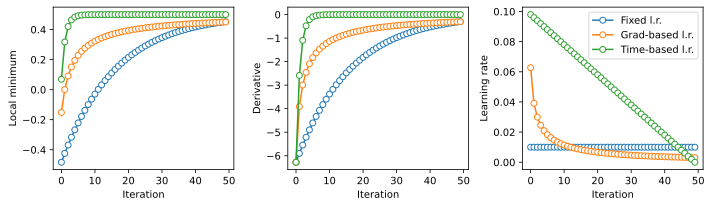

In [18]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
# generate the plots
for i in range(3):
    ax[i].plot(modelparamsFixed[:, i], "o-", markerfacecolor="w")
    ax[i].plot(modelparamsgrad[:, i], "o-", markerfacecolor="w")
    ax[i].plot(modelparamstime[:, i], "o-", markerfacecolor="w")
    ax[i].set_xlabel("Iteration")

ax[0].set_ylabel("Local minimum")
ax[1].set_ylabel("Derivative")
ax[2].set_ylabel("Learning rate")
ax[2].legend(["Fixed l.r.", "Grad-based l.r.", "Time-based l.r."])

plt.tight_layout()
plt.show()

In [28]:
# Fixed Learning Rate with Timebased Lr average
# Random starting point
local_min_fixed = copy.deepcopy(local_min)

print("Starting point of local_min: ", local_min_fixed)
# Learning Parameters
traning_epochs = 50
learning_rate = lr_time_avg
modelparamsFixed = np.zeros((traning_epochs, 3), dtype=object)

# Run through training with variable LR
for i in range(traning_epochs):
    grad = dfx(local_min_fixed)
    local_min_fixed = local_min_fixed - learning_rate * grad
    modelparamsFixed[i, :] = local_min_fixed, grad, learning_rate
print(f"Local min fixed : {local_min_fixed}")
print(local_min, local_min_fixed)

Starting point of local_min:  [-0.546]
Local min fixed : [0.49999997]
[-0.546] [0.49999997]


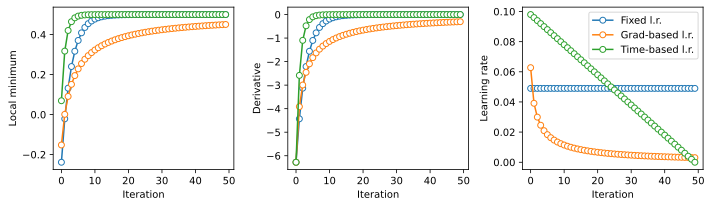

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(10, 3))
# generate the plots
for i in range(3):
    ax[i].plot(modelparamsFixed[:, i], "o-", markerfacecolor="w")
    ax[i].plot(modelparamsgrad[:, i], "o-", markerfacecolor="w")
    ax[i].plot(modelparamstime[:, i], "o-", markerfacecolor="w")
    ax[i].set_xlabel("Iteration")

ax[0].set_ylabel("Local minimum")
ax[1].set_ylabel("Derivative")
ax[2].set_ylabel("Learning rate")
ax[2].legend(["Fixed l.r.", "Grad-based l.r.", "Time-based l.r."])

plt.tight_layout()
plt.show()